In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests as req
import pandas as pd
import json
import random
from citipy import citipy
import openweathermapy.core as ow
from config import api_key
from urllib.error import HTTPError

In [3]:
# Create settings dictionary with information we're interested in
settings = {"units": "imperial", "appid": "25bc90a1196e6f153eece0bc0b0fc9eb"}
weather_data = []

In [4]:
# Pull 500 Randomly Generated City Coordinates
lat = []
lon = []
cities = set([])

# While loop will populate cities set until it reaches 500 non repeating cities
while len(cities) < 1000: #Use this when you are finally ready to run program for 500 cities  
    lati = (random.randrange(-90,90,1))
    long = (random.randrange(-180,180,1))
    city = citipy.nearest_city(lati,long)
    city = city.city_name
    lat.append(lat)
    lon.append(long)
    cities.add(city)

cities = list(cities)

In [5]:
# Create a list to store JSONs of the weather data results and start a counter to run through randomly generated cities
weather_data = []
counter = []
count = 0

# Run a for loop that runs through the list of cities
for city in cities:
    if count < 500:
        try:
            data = ow.get_current(city, **settings)
            weather_data.append(data)
            count = count + 1
            counter.append(count)
        except Exception as e:
            print(city, ": not found  ", e)
            continue
            
            
# Generate a data frame from 500 callable cities    
summary = ["name", "dt","sys.country","coord.lat", "coord.lon", "main.temp_max", "main.humidity", "clouds.all", "wind.speed"]
data = [response(*summary) for response in weather_data]
column_names = ["City", "Time", "Country", "Latitude", "Longitude", "Temperature", "Humidity", "Cloud Coverage", "Wind Speed"]
weather_data = pd.DataFrame(data, index = counter, columns=column_names)


sorvag : not found   HTTP Error 404: Not Found
amderma : not found   HTTP Error 404: Not Found
bousso : not found   HTTP Error 404: Not Found
formoso do araguaia : not found   HTTP Error 404: Not Found
taolanaro : not found   HTTP Error 404: Not Found
bengkulu : not found   HTTP Error 404: Not Found
tasbuget : not found   HTTP Error 404: Not Found
krasnoselkup : not found   HTTP Error 404: Not Found
camana : not found   HTTP Error 404: Not Found
bolungarvik : not found   HTTP Error 404: Not Found
mocambique : not found   HTTP Error 404: Not Found
cozumel : not found   HTTP Error 404: Not Found
alotau : not found   HTTP Error 404: Not Found
tumannyy : not found   HTTP Error 404: Not Found
babanusah : not found   HTTP Error 404: Not Found
labutta : not found   HTTP Error 404: Not Found
banmo : not found   HTTP Error 404: Not Found
bardiyah : not found   HTTP Error 404: Not Found
leshan : not found   HTTP Error 404: Not Found
temaraia : not found   HTTP Error 404: Not Found
stornoway : no

In [6]:
# Generate a print out list of cities
cities_list = weather_data
cities_list.to_csv("Cities_Output.csv")

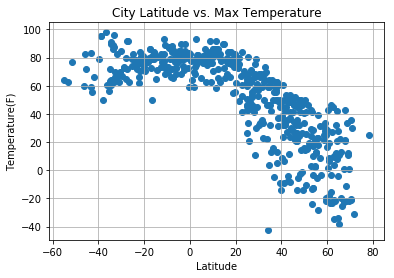

In [7]:

# Build a scatter plot for lat v. temp
plt.scatter(weather_data["Latitude"], weather_data["Temperature"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatvMaxTemp.png")

# Show plot
plt.show()

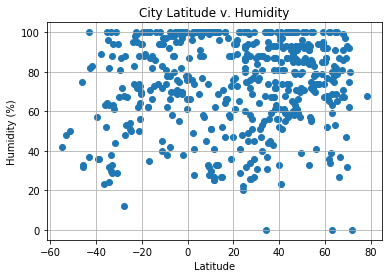

In [8]:
# Build a scatter plot for lat v. humidity
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude v. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatvHum.png")

# Show plot
plt.show()

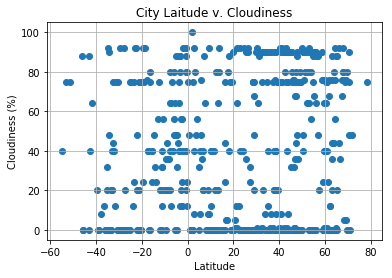

In [9]:
# Build a scatter plot for temp v. cloudiness
plt.scatter(weather_data["Latitude"], weather_data["Cloud Coverage"], marker="o")

# Incorporate the other graph properties
plt.title("City Laitude v. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatvCloudiness.png")

# Show plot
plt.show()

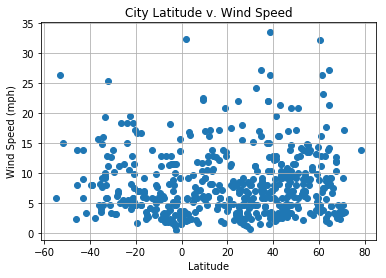

In [10]:
# Build a scatter plot for temp v. wind speed
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude v. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatvWind.png")

# Show plot
plt.show()